![](https://cdn.britannica.com/72/239572-050-F878B4FD/Uber-driver-holds-smartphone-in-car.jpg)

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Uber Data Analysis</h1> </center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv


# Data Understanding

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Understanding</h1> </center>

In [2]:
df = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Let's explore variables, their data types, and total non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Cleaning

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Cleaning</h1> </center>

In [4]:
# Filling NULL values in feature PURPOSE
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

# After this imputation, we are left with 1 NULL value in features - END_DATE, CATEGORY, START, and STOP. We can handle the NULL values by dropping that record
df.dropna(inplace = True)

df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Data Preprocessing

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Preprocessing</h1> </center>

In [5]:
# converting START_DATE and END_DATE into datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

#create new feature representing time of the ride - morning, afternoon, evening, night
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

#create new feature representing month of the ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)
#create new feature representing day (week) of the ride
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

# duration of the ride
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


# Data Exploration

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Exploration</h1> </center>

In [6]:
# summary statistics of the dataset
df.describe()


,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


In [7]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))


Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [8]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))


Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


# Data Visualization

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Data Visualization</h1> </center>

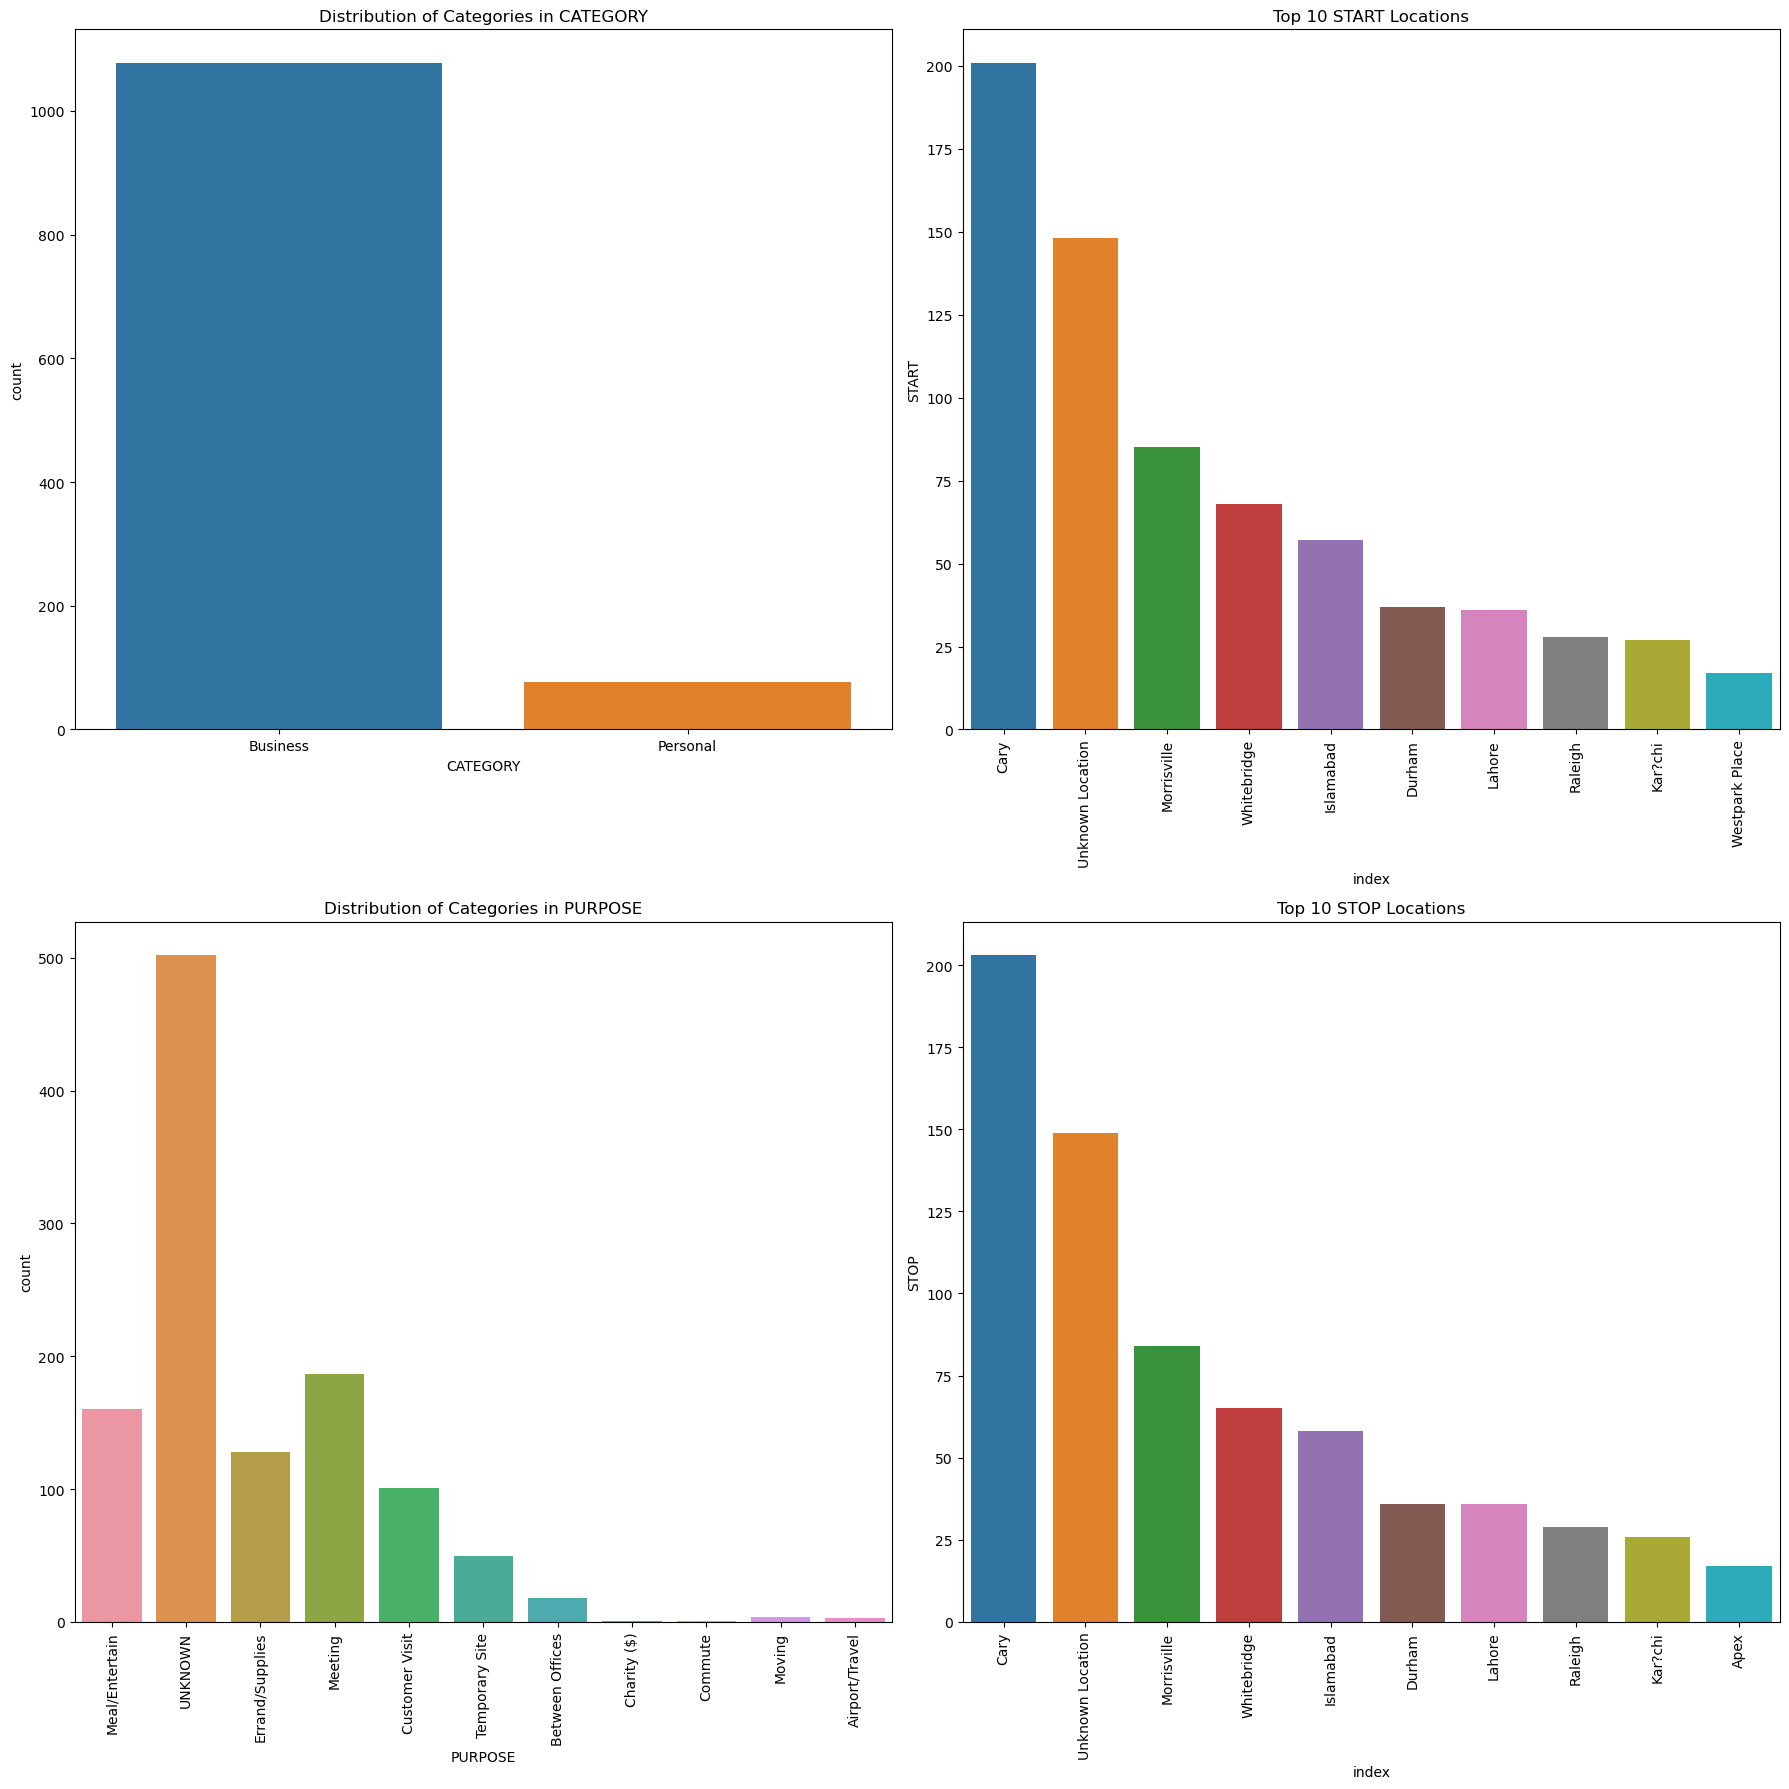

In [9]:


# Convert 'CATEGORY' column to categorical data type
df['CATEGORY'] = df['CATEGORY'].astype('category')

fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Distribution of Categories in CATEGORY
sns.countplot(data=df, x='CATEGORY', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')

# Distribution of Categories in PURPOSE
sns.countplot(data=df, x='PURPOSE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Top 10 locations for START
temp = df['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='START', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

# Top 10 locations for STOP
temp = df['STOP'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='STOP', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


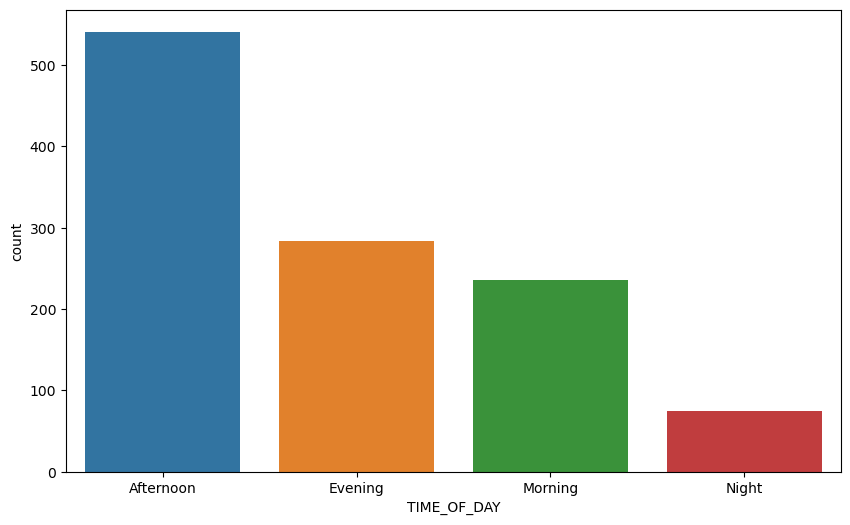

In [10]:


# Convert 'TIME_OF_DAY' column to categorical data type
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()



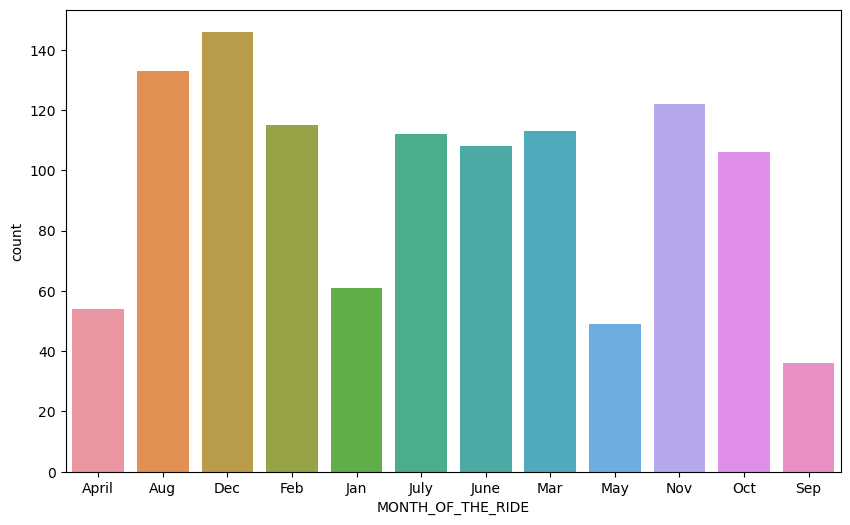

In [11]:


# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')
plt.show()



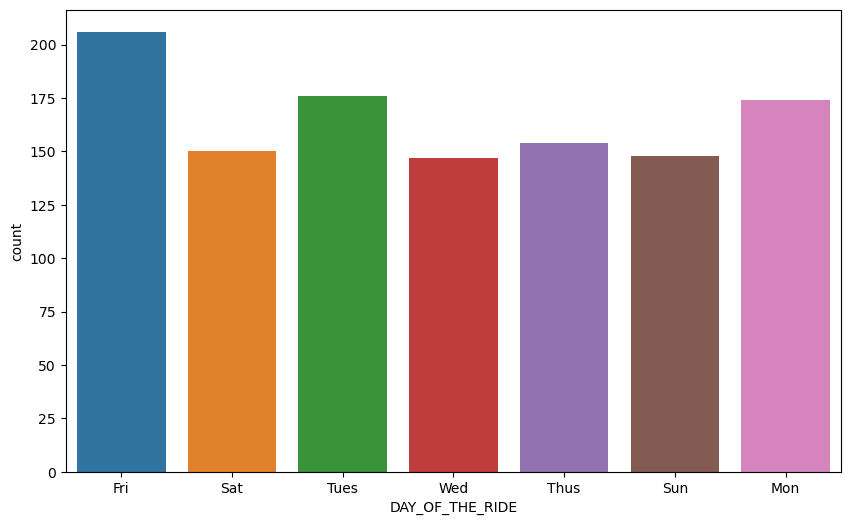

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_THE_RIDE')
plt.show()



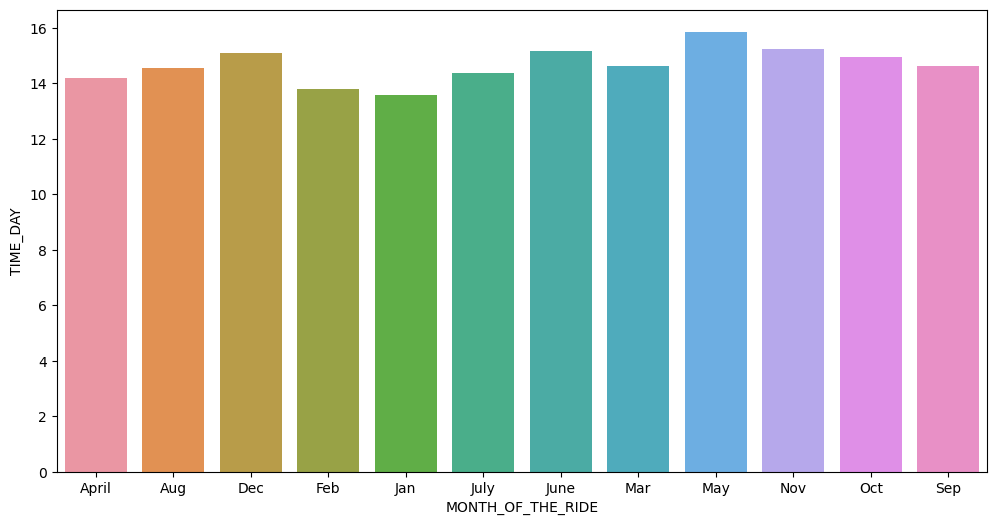

In [13]:
plt.figure(figsize=(12, 6))
temp = df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(x='MONTH_OF_THE_RIDE', y='TIME_DAY', data=temp)
plt.show()



In [14]:
df.to_csv('cleaning_uder_data')

<center> <h1 style="color:white; background-color:black; font-size:50px;" >Thank You</h1> </center>